# Exploration of Baseline Predictions

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules:" data-toc-modified-id="Import-Modules:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules:</a></span></li><li><span><a href="#Import-Data:" data-toc-modified-id="Import-Data:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data:</a></span></li><li><span><a href="#Process-Data-into-Batches:" data-toc-modified-id="Process-Data-into-Batches:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Process Data into Batches:</a></span><ul class="toc-item"><li><span><a href="#Split-Data:" data-toc-modified-id="Split-Data:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Split Data:</a></span></li><li><span><a href="#Save-Batches:" data-toc-modified-id="Save-Batches:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Save Batches:</a></span></li></ul></li><li><span><a href="#Generate-Baseline-Predictions-for-each-Batch:" data-toc-modified-id="Generate-Baseline-Predictions-for-each-Batch:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate Baseline Predictions for each Batch:</a></span></li><li><span><a href="#Plot-Distribution-of-Number-of-Open-Ion-Channels:" data-toc-modified-id="Plot-Distribution-of-Number-of-Open-Ion-Channels:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot Distribution of Number of Open Ion Channels:</a></span></li></ul></div>

### Import Modules:

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Import Data:

In [30]:
train = pd.read_csv('../../../../Capstone_Project_Data/train_data1.csv',index_col='Unnamed: 0')
train.head(2)

C:\Users\jackh\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,time,signal,open_channels,diff_open_channels,len_same_open_channels,ewm_signal,dsdt,d2sdt2
0,0.0001,-2.7600,0,0,0,-2.7600,-0.0957,0.272000
1,0.0002,-2.8557,0,0,1,-2.8238,0.1763,-0.023325


In [34]:
test = pd.read_csv('../../../../Capstone_Project_Data/test_data1.csv',index_col='Unnamed: 0')
test.head(2)

C:\Users\jackh\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,time,signal,ewm_signal,dsdt,d2sdt2
0,500.0001,-2.6498,-2.649800,-0.1996,0.0945
1,500.0002,-2.8494,-2.782867,-0.1051,0.2034


### Process Data into Batches:

#### Split Data:

In [55]:
def to_batches(df_input):
    n_batch = int(df_input.shape[0] / 500000)
    dictionary = {}
    for i in range(0,n_batch):
        df = df_input[i*500000:(i+1)*500000]
        dictionary["batch_" + str(i)] = df
    return dictionary

In [56]:
test_dict = to_batches(test)

In [58]:
train_dict = to_batches(train)

In [144]:
for i in train_dict:
    print(train_dict[i].shape)

(500000, 8)
(500000, 8)
(500000, 8)
(500000, 8)
(500000, 8)
(500000, 8)
(500000, 8)
(500000, 8)
(500000, 8)
(500000, 8)


#### Save Batches:

In [63]:
def save_dict(dict_data,name):
    for i in dict_data:
        file_path = '../../../../Capstone_Project_Data/{}_{}.csv'.format(name,i)
        dict_data[i].to_csv(file_path)
    return

In [64]:
save_dict(test_dict,"test")

In [65]:
save_dict(train_dict,"train")

### Generate Baseline Predictions for each Batch:

In [189]:
def baseline_pred(dict_data):
    batch = []
    baseline = []
    prediction = []
    for i in dict_data:
        df = dict_data[i]
        bl = df['open_channels'].value_counts(normalize=True).max()
        pred = df['open_channels'].value_counts().idxmax()
        print(i,bl,pred)
        batch.append(i)
        baseline.append(bl)
        prediction.append(pred)
    
    d = {'Batch':batch,'Baseline':baseline,'Prediction':prediction}
    results = pd.DataFrame(data=d)
    return results

In [190]:
Baseline_Predictions = baseline_pred(train_dict)

batch_0 0.968268 0
batch_1 0.961324 0
batch_2 0.747992 1
batch_3 0.433766 2
batch_4 0.264638 7
batch_5 0.375164 4
batch_6 0.75361 1
batch_7 0.433318 2
batch_8 0.371692 4
batch_9 0.265392 7


In [191]:
macro_baseline = train['open_channels'].value_counts(normalize=True).max()
marco_prediction = train['open_channels'].value_counts().idxmax()

print("Baseline Prediction:",marco_prediction, "with a probablity of",macro_baseline)

Baseline Prediction: 0 with a probablity of 0.2480304


In [192]:
distribution = train['open_channels'].value_counts(normalize=True,sort=False)
pd.DataFrame(train['open_channels'].value_counts(normalize=True))

,open_channels
0,0.248030
1,0.197173
3,0.133722
2,0.110785
4,0.080682
5,0.055575
7,0.053003
8,0.049037
6,0.037622
9,0.027224


### Plot Distribution of Number of Open Ion Channels:

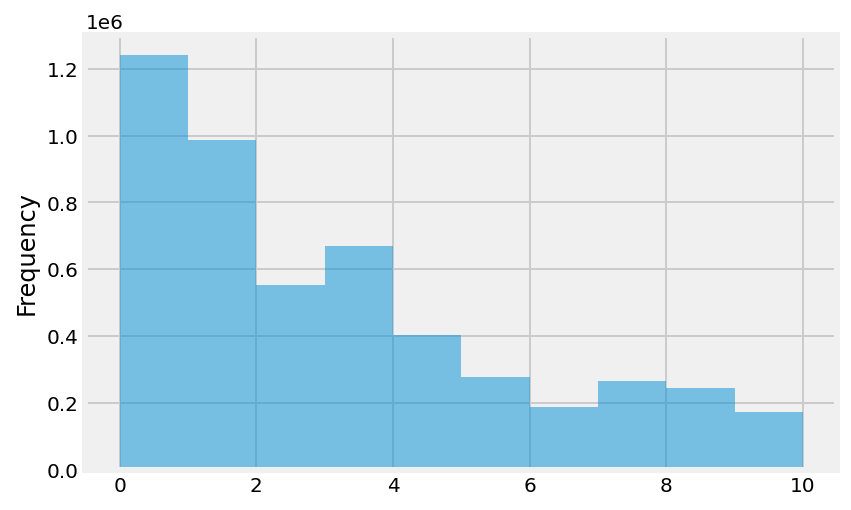

In [166]:
ax = train['open_channels'].plot.hist(bins=10, alpha=0.5)
plt.show()

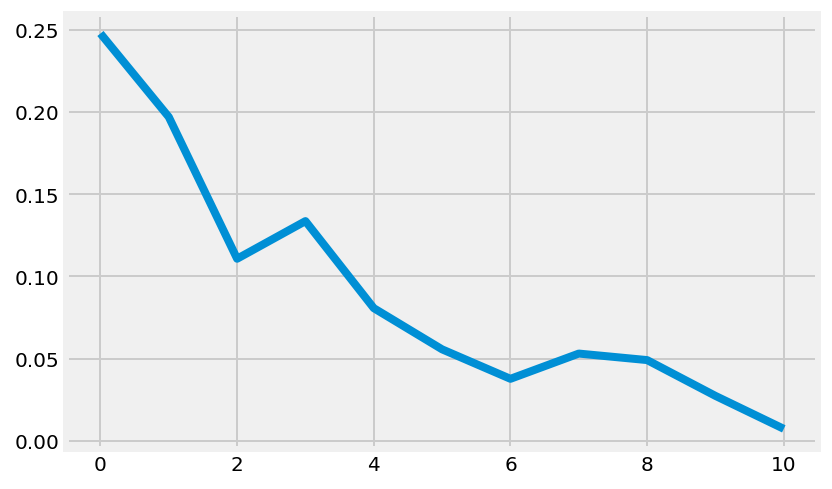

In [193]:
plt.plot(distribution)
plt.show()